### Analisando dados de Criminalidade de Sorocaba

## Objetivo: Criar um unico documento com as ocorrências dividas por DP (regiões de Sorocaba)

## Grupo 04:
  * Caio Cesar Tascano
  * Douglas
  * Gabriel
  * Matheus
  * Vinicius

## Fonte: https://www.ssp.sp.gov.br/estatistica/dados-mensais






# Baixando dados através do Pandas

In [50]:
# Importando bibliotecas
!pip install -q pandera
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt


In [20]:
# Looping para dados em um unico dicionario
arq_dict = {}
for arq in range(1,13):
  arquivo = pd.read_excel(f'sorocaba_dp_{arq}.xlsx')
  arq_dict[f'sorocaba_dp_{arq}'] = arquivo

arq_dict['sorocaba_dp_1']

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,HOMICÍDIO DOLOSO (2),0,0,1,1,0,0,0,0,2,0,0,1,5
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),0,0,1,1,0,0,0,0,2,0,0,1,5
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,1,0,1,0,0,0,0,0,2
5,HOMICÍDIO CULPOSO OUTROS,0,0,0,0,0,0,0,0,0,0,0,0,0
6,TENTATIVA DE HOMICÍDIO,0,0,1,0,0,0,0,0,1,0,0,2,4
7,LESÃO CORPORAL SEGUIDA DE MORTE,0,0,0,0,0,0,0,0,0,0,0,0,0
8,LESÃO CORPORAL DOLOSA,16,7,16,22,13,11,11,16,10,16,11,11,160
9,LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO,4,1,8,1,7,3,3,4,8,3,6,4,52


# Removendo o que não interessa

In [36]:
# Nova variavel dic_ocorrencias
dic_ocorrencias = {}

#Looping para criar dicionário com ocorrencias totais
for arq in arq_dict:
  dic_ocorrencias[f'DP_{arq}'] = arq_dict[arq].iloc[:, 13].sum()

dic_ocorrencias

{'DP_sorocaba_dp_1': 1529,
 'DP_sorocaba_dp_2': 1165,
 'DP_sorocaba_dp_3': 1033.301,
 'DP_sorocaba_dp_4': 1263,
 'DP_sorocaba_dp_5': 645.025,
 'DP_sorocaba_dp_6': 1203,
 'DP_sorocaba_dp_7': 150,
 'DP_sorocaba_dp_8': 1856.659,
 'DP_sorocaba_dp_9': 1221.498,
 'DP_sorocaba_dp_10': 572,
 'DP_sorocaba_dp_11': 2244,
 'DP_sorocaba_dp_12': 0}

# Criando novo dataframe com ocorrencias totais por DP

In [55]:
## Criando um dataframe para manipulação pandera
dataframe_ocorrencias = pd.DataFrame.from_dict(dic_ocorrencias, orient='index', columns=['Valor'])
## Resetando Index para facilitar visuaização
dataframe_ocorrencias.reset_index(inplace=True)
dataframe_ocorrencias.columns = ['Departamento de Policia', 'Ocorrencias_Totais']

dataframe_ocorrencias['Ocorrencias_Totais'] = dataframe_ocorrencias['Ocorrencias_Totais'].astype(int) ## Transformando em numeros inteiros
dataframe_ocorrencias.head()


,Departamento de Policia,Ocorrencias_Totais
0,DP_sorocaba_dp_1,1529
1,DP_sorocaba_dp_2,1165
2,DP_sorocaba_dp_3,1033
3,DP_sorocaba_dp_4,1263
4,DP_sorocaba_dp_5,645


# Validação dos dados através do pandera

In [49]:
schema = pa.DataFrameSchema(
    columns = {
        "Departamento de Policia":pa.Column(pa.String),
        "Ocorrencias_Totais":pa.Column(pa.Int)
    }
)

schema.validate(dataframe_ocorrencias)

,Departamento de Policia,Ocorrencias_Totais
0,DP_sorocaba_dp_1,1529
1,DP_sorocaba_dp_2,1165
2,DP_sorocaba_dp_3,1033
3,DP_sorocaba_dp_4,1263
4,DP_sorocaba_dp_5,645
5,DP_sorocaba_dp_6,1203
6,DP_sorocaba_dp_7,150
7,DP_sorocaba_dp_8,1856
8,DP_sorocaba_dp_9,1221
9,DP_sorocaba_dp_10,572


## Gerando graficos

# Gráfico de barras

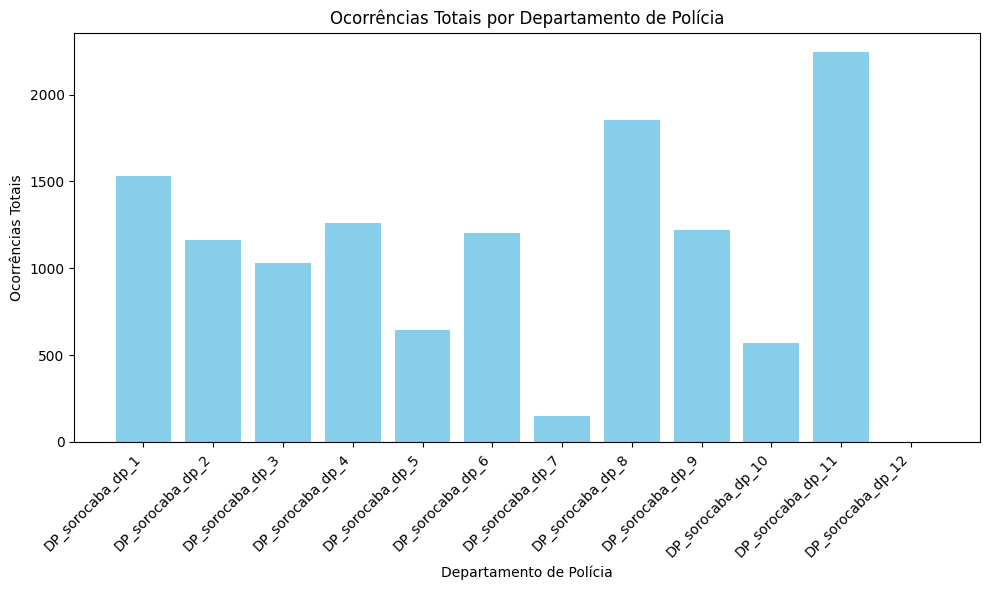

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(dataframe_ocorrencias['Departamento de Policia'], dataframe_ocorrencias['Ocorrencias_Totais'], color='skyblue')
plt.xlabel('Departamento de Polícia')
plt.ylabel('Ocorrências Totais')
plt.title('Ocorrências Totais por Departamento de Polícia')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos no eixo X
plt.tight_layout()  # Ajuste para evitar sobreposição dos rótulos
plt.show()

# Gráfico de Linhas

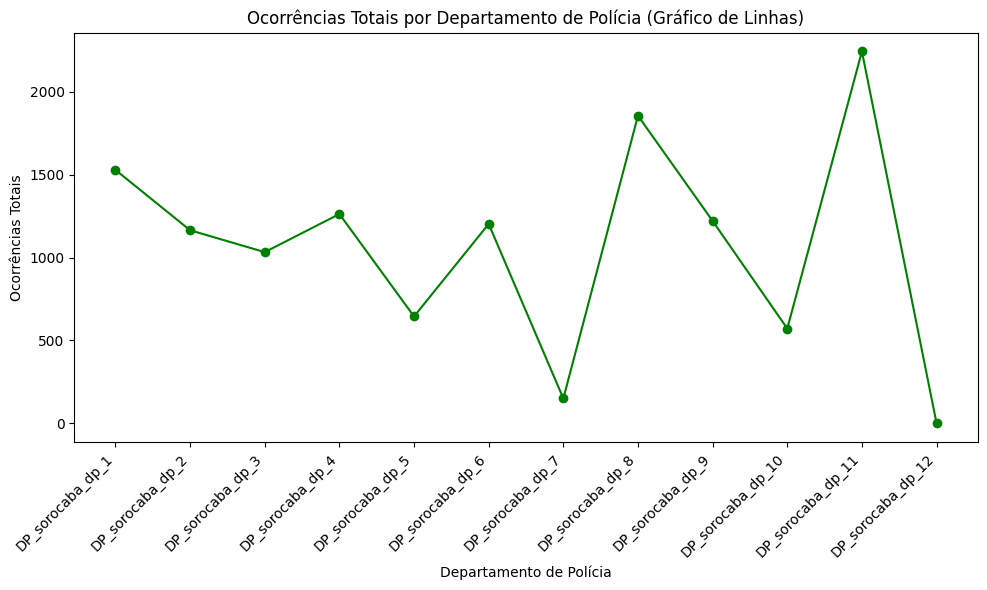

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(dataframe_ocorrencias['Departamento de Policia'], dataframe_ocorrencias['Ocorrencias_Totais'], marker='o', color='green')
plt.xlabel('Departamento de Polícia')
plt.ylabel('Ocorrências Totais')
plt.title('Ocorrências Totais por Departamento de Polícia (Gráfico de Linhas)')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos no eixo X
plt.tight_layout()  # Ajuste para evitar sobreposição dos rótulos
plt.show()

# Gráfico de pizza

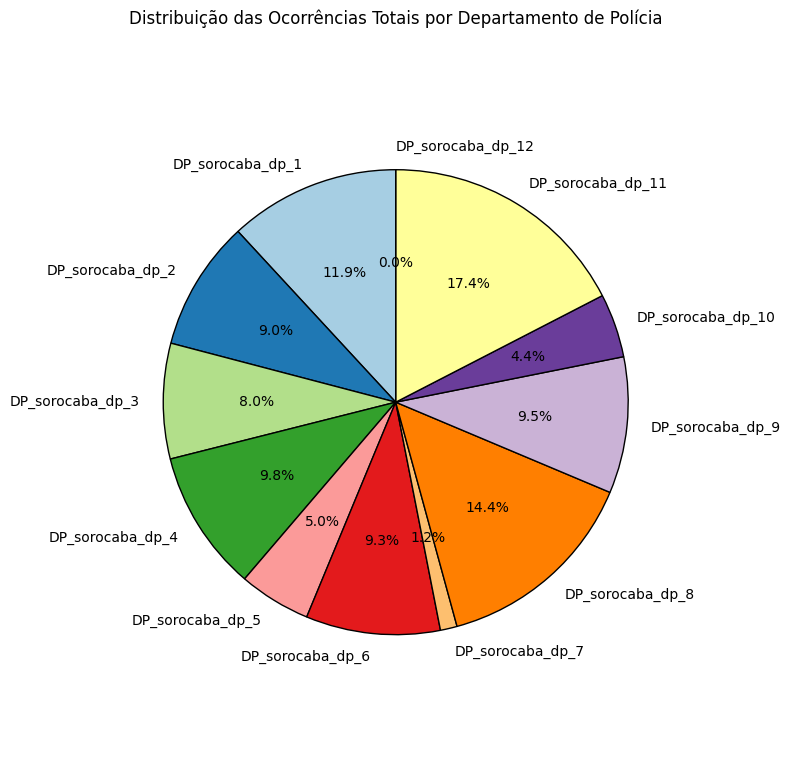

In [53]:
plt.figure(figsize=(8, 8))  # Tamanho do gráfico
plt.pie(dataframe_ocorrencias['Ocorrencias_Totais'],
        labels=dataframe_ocorrencias['Departamento de Policia'],
        autopct='%1.1f%%',  # Exibir o percentual
        startangle=90,  # Iniciar o gráfico de cima
        colors=plt.cm.Paired.colors,  # Definir cores variadas
        wedgeprops={'edgecolor': 'black'}  # Definir bordas nas fatias
       )

plt.title('Distribuição das Ocorrências Totais por Departamento de Polícia')
plt.axis('equal')  # Garantir que o gráfico de pizza seja circular
plt.tight_layout()  # Ajustar o layout
plt.show()

# Gráfico de barra laterais

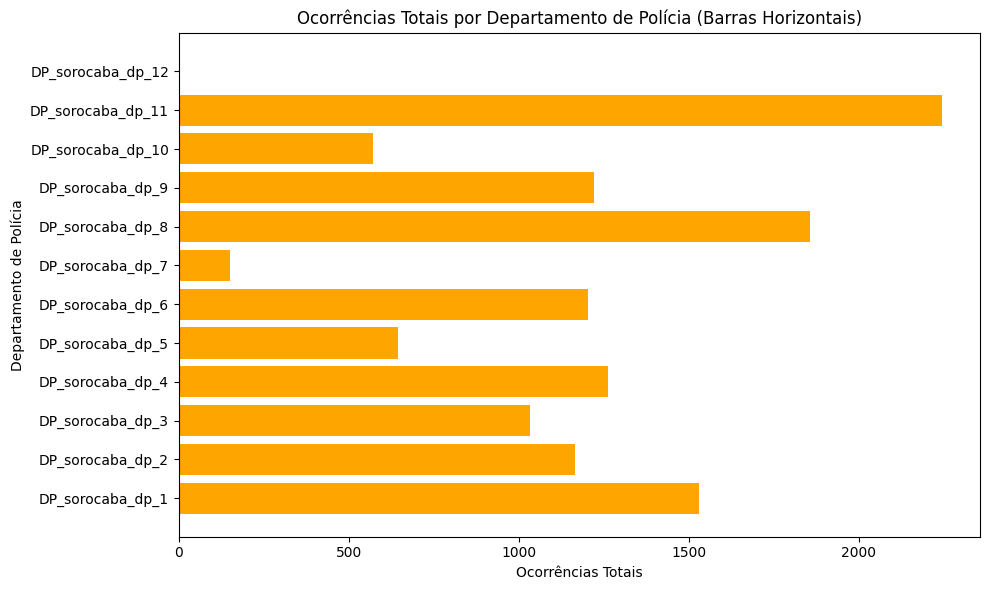

In [54]:
# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(dataframe_ocorrencias['Departamento de Policia'], dataframe_ocorrencias['Ocorrencias_Totais'], color='orange')
plt.xlabel('Ocorrências Totais')
plt.ylabel('Departamento de Polícia')
plt.title('Ocorrências Totais por Departamento de Polícia (Barras Horizontais)')
plt.tight_layout()
plt.show()